In [1]:
# student_performance_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set(style="whitegrid")

# Load dataset (adjust path if needed)
df = pd.read_csv('../data/student-mat.csv', sep=';')

# Show first 5 rows
print(df.head())


Matplotlib is building the font cache; this may take a moment.


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Shape: (395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    objec

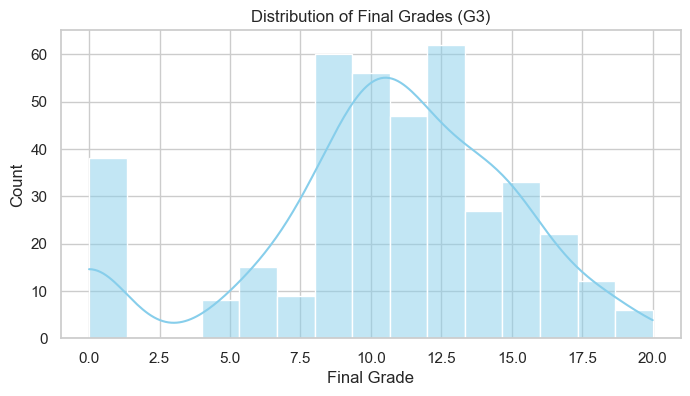

In [2]:
# Check dataset shape and info
print(f"Shape: {df.shape}")
print(df.info())

# Check missing values
print(df.isnull().sum())

# Describe numerical columns
print(df.describe())

# Distribution of final grade (G3)
plt.figure(figsize=(8,4))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()


In [3]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Create a new column: performance category (Low/Medium/High)
# Example: G3 < 10 = Low, 10-15 = Medium, >15 = High
def grade_category(grade):
    if grade < 10:
        return 'Low'
    elif grade <= 15:
        return 'Medium'
    else:
        return 'High'

df['Performance'] = df['G3'].apply(grade_category)

print(df[['G3', 'Performance']].head())


   G3 Performance
0   6         Low
1   6         Low
2  10      Medium
3  15      Medium
4  10      Medium


C:\Users\Hi-Tech\AppData\Local\Temp\ipykernel_2516\769252406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance', data=df, palette='pastel')


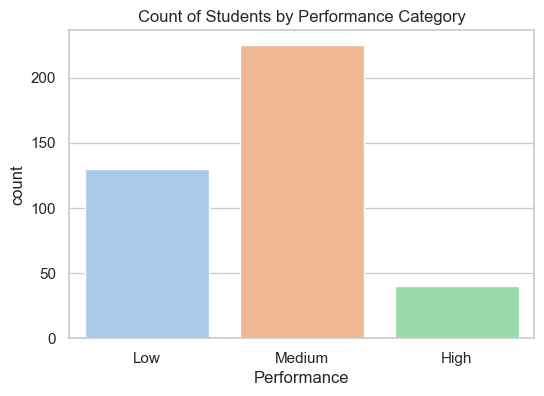

ValueError: could not convert string to float: 'Low'

<Figure size 1200x1000 with 0 Axes>

In [4]:
# Count of each performance category
plt.figure(figsize=(6,4))
sns.countplot(x='Performance', data=df, palette='pastel')
plt.title('Count of Students by Performance Category')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Relationship between study time and final grade
plt.figure(figsize=(6,4))
sns.boxplot(x='studytime', y='G3', data=df, palette='muted')
plt.title('Study Time vs Final Grade')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df.drop(['G3', 'Performance'], axis=1)
y = df['Performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8227848101265823
              precision    recall  f1-score   support

        High       1.00      0.40      0.57        10
         Low       0.83      0.89      0.86        27
      Medium       0.80      0.88      0.84        42

    accuracy                           0.82        79
   macro avg       0.88      0.72      0.76        79
weighted avg       0.84      0.82      0.81        79



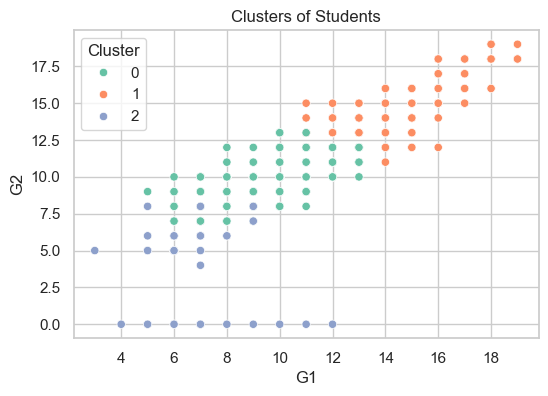

In [6]:
from sklearn.cluster import KMeans

# We'll use G1, G2, G3 and studytime as features for clustering
cluster_data = df[['G1', 'G2', 'G3', 'studytime']]

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters in 2D (using G1 and G2)
plt.figure(figsize=(6,4))
sns.scatterplot(x='G1', y='G2', hue='Cluster', data=df, palette='Set2')
plt.title('Clusters of Students')
plt.show()
